In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 200
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import numpy as np
from datetime import datetime
import glob

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import resample
from dateutil import relativedelta

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import pandas_profiling
import seaborn as sns
from scipy import stats
import statistics 

In [2]:
# =============================================================================
# Leitura de base de dados em csv dos "Dados_alunos_curso_SEI_Fev_2018_a_Jun_2019"
# =============================================================================
mydateparser = lambda x: pd.to_datetime(x, format="%d/%m/%Y %H:%M") 


alunos = pd.read_csv("dados\Curso-SEI-Dados-e-Notas-Alunos-20200121.csv",sep = ';',encoding ='cp860',parse_dates=
                     ['dt_inscricao','dt_fim_inscricao'])


#Tranformando o campo de data de nascimento em um objeto 'data'
alunos['dt_nascimento'] = alunos.apply(lambda row : pd.to_datetime(row['dt_nascimento']) , axis = 1) 

In [3]:
alunos['data_entrega_atividade_1'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_1']) , axis = 1) 
alunos['data_entrega_atividade_2'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_2']) , axis = 1) 
alunos['data_entrega_atividade_3'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_3']) , axis = 1) 
alunos['data_entrega_atividade_4'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_4']) , axis = 1) 
alunos['data_entrega_atividade_5'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_5']) , axis = 1) 
alunos['data_entrega_atividade_6'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_6']) , axis = 1) 
alunos['data_entrega_atividade_7'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_7']) , axis = 1) 
alunos['data_entrega_atividade_8'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_8']) , axis = 1) 
alunos['data_entrega_atividade_9'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_9']) , axis = 1) 
alunos['data_entrega_atividade_10'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_10']) , axis = 1) 
alunos['data_entrega_atividade_11'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_11']) , axis = 1) 
alunos['data_entrega_atividade_12'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_12']) , axis = 1) 
alunos['data_entrega_atividade_13'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_13']) , axis = 1) 
alunos['data_entrega_atividade_14'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_14']) , axis = 1) 
alunos['data_entrega_atividade_15'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_15']) , axis = 1) 
alunos['data_entrega_atividade_16'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_16']) , axis = 1) 
alunos['data_entrega_atividade_17'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_17']) , axis = 1) 
alunos['data_entrega_atividade_18'] = alunos.apply(lambda row : pd.to_datetime(row['data_entrega_atividade_18']) , axis = 1) 


In [4]:
alunos

,∩╗┐index,id_inscricao,dt_inscricao,dt_fim_inscricao,tx_nome_aluno,sg_uf,tp_sexo,dt_nascimento,sg_pais,id_oferta_x,id_curso,qt_carga_horaria_oferta,qt_duracao_dias,tx_nome_orgao,sit_matricula,tp_servidor_militar_cidadao,tp_poder_execut_legisl_judic,esfera,idade,churn,id_oferta_y,id_pessoa,nota_maxima_curso,nota_final_aluno_curso,data_termino_curso_aluno,nota_maxima_atividade_1,nota_aluno_atividade_1,data_entrega_atividade_1,nota_maxima_atividade_2,nota_aluno_atividade_2,data_entrega_atividade_2,nota_maxima_atividade_3,nota_aluno_atividade_3,data_entrega_atividade_3,nota_maxima_atividade_4,nota_aluno_atividade_4,data_entrega_atividade_4,nota_maxima_atividade_5,nota_aluno_atividade_5,data_entrega_atividade_5,nota_maxima_atividade_6,nota_aluno_atividade_6,data_entrega_atividade_6,nota_maxima_atividade_7,nota_aluno_atividade_7,data_entrega_atividade_7,nota_maxima_atividade_8,nota_aluno_atividade_8,data_entrega_atividade_8,nota_maxima_atividade_9,nota_aluno_atividade_9,data_entrega_atividade_9,nota_maxima_atividade_10,nota_aluno_atividade_10,data_entrega_atividade_10,nota_maxima_atividade_11,nota_aluno_atividade_11,data_entrega_atividade_11,nota_maxima_atividade_12,nota_aluno_atividade_12,data_entrega_atividade_12,nota_maxima_atividade_13,nota_aluno_atividade_13,data_entrega_atividade_13,nota_maxima_atividade_14,nota_aluno_atividade_14,data_entrega_atividade_14,nota_maxima_atividade_15,nota_aluno_atividade_15,data_entrega_atividade_15,nota_maxima_atividade_16,nota_aluno_atividade_16,data_entrega_atividade_16,nota_maxima_atividade_17,nota_aluno_atividade_17,data_entrega_atividade_17,nota_maxima_atividade_18,nota_aluno_atividade_18,data_entrega_atividade_18
0,0,92,2018-02-19 00:00:00,2018-03-12 07:42:00,Raylle Hostalacio de Pinho Tavares,MG,F,1958-07-28,NaN,26,74,20,30,NaN,APROVADO,S,E,E,59,False,26,448556,100.0,95.24050,2018-03-07 08:05:50,100.0,100.0,2018-02-20 08:58:57,100.0,100.0,2018-02-20 09:07:44,100.0,100.0,2018-03-07 07:29:17,100.0,100.0,2018-02-21 08:05:49,100.0,100.0,2018-02-22 07:56:43,100.0,100.00,2018-02-22 08:08:30,100.0,100.0,2018-02-23 07:24:35,100.0,100.0,2018-02-23 07:55:10,100.0,100.00,2018-02-23 08:30:46,100.0,83.33,2018-03-07 07:46:43,100.0,77.78,2018-03-07 08:05:50,100.0,83.33,2018-02-28 08:22:58,100.0,100.0,2018-03-01 07:59:11,100.0,90.0,2018-03-02 08:03:11,100.0,100.00,2018-03-02 08:30:38,100.0,88.89,2018-03-05 07:40:28,100.0,100.00,2018-03-06 07:42:09,100.0,100.0,2018-07-03 07:18:59
1,1,94,2018-02-19 00:00:00,2018-03-12 07:59:00,HENRICLAY CERNADAS PEREIRA,RJ,M,1973-06-15,NaN,26,74,20,30,Universidade Federal Fluminense,ABANDONO,S,E,F,44,True,26,180937,100.0,NaN,NaN,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT
2,2,97,2018-02-19 00:00:00,2018-03-12 08:44:00,THAIS AMARAL COUTINHO,MG,F,1949-06-19,NaN,26,74,20,30,NaN,APROVADO,S,E,E,68,False,26,448559,100.0,100.00000,2018-03-04 09:10:30,100.0,100.0,2018-03-03 07:16:18,100.0,100.0,2018-02-19 19:30:28,100.0,100.0,2018-03-03 07:52:42,100.0,100.0,2018-03-03 08:05:55,100.0,100.0,2018-03-03 08:25:40,100.0,100.00,2018-03-03 08:38:47,100.0,100.0,2018-03-03 09:12:31,100.0,100.0,2018-03-03 09:34:45,100.0,100.00,2018-03-03 10:22:06,100.0,100.00,2018-03-03 13:34:16,100.0,100.00,2018-03-03 14:12:16,100.0,100.00,2018-03-03 14:42:09,100.0,100.0,2018-03-03 15:04:13,100.0,100.0,2018-03-03 19:23:30,100.0,100.00,2018-03-03 19:35:08,100.0,100.00,2018-03-04 08:13:14,100.0,100.00,2018-03-04 08:36:16,100.0,100.0,2018-04-03 09:10:30
3,3,106,2018-02-19 00:00:00,2018-03-12 09:45:00,Thiago vieira Medeiros,DF,M,1984-10-07,NaN,26,74,20,30,NaN,APROVADO,C,NaN,NaN,33,False,26,448565,100.0,92.40583,2018-02-22 18:55:09,100.0,80.0,2018-02-19 14:54:34,100.0,100.0,2018-02-19 14:59:45,100.0,75.0,2018-02-20 09:35:52,100.0,100.0,2018-02-20 09:46:59,100.0,100.0,2018-02-20 10:15:30,100.0,85.71,2018-02-2

In [5]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79614 entries, 0 to 79613
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ∩╗┐index                      79614 non-null  int64         
 1   id_inscricao                  79614 non-null  int64         
 2   dt_inscricao                  79614 non-null  datetime64[ns]
 3   dt_fim_inscricao              79614 non-null  datetime64[ns]
 4   tx_nome_aluno                 79614 non-null  object        
 5   sg_uf                         79107 non-null  object        
 6   tp_sexo                       79614 non-null  object        
 7   dt_nascimento                 79614 non-null  datetime64[ns]
 8   sg_pais                       67871 non-null  object        
 9   id_oferta_x                   79614 non-null  int64         
 10  id_curso                      79614 non-null  int64         
 11  qt_carga_horaria_oferta     

In [6]:
alunos.isnull().sum()

∩╗┐index                            0
id_inscricao                        0
dt_inscricao                        0
dt_fim_inscricao                    0
tx_nome_aluno                       0
sg_uf                             507
tp_sexo                             0
dt_nascimento                       0
sg_pais                         11743
id_oferta_x                         0
id_curso                            0
qt_carga_horaria_oferta             0
qt_duracao_dias                     0
tx_nome_orgao                   44286
sit_matricula                       0
tp_servidor_militar_cidadao         0
tp_poder_execut_legisl_judic    35645
esfera                           8156
idade                               0
churn                               0
id_oferta_y                         0
id_pessoa                           0
nota_maxima_curso                   0
nota_final_aluno_curso          27091
data_termino_curso_aluno        27091
nota_maxima_atividade_1             0
nota_aluno_a

In [7]:
alunos['dt_fim_inscricao'].min()

Timestamp('2018-03-12 07:42:00')

In [8]:
alunos['dt_fim_inscricao'].max()

Timestamp('2019-03-30 23:59:00')

In [9]:
(alunos.index)

RangeIndex(start=0, stop=79614, step=1)

In [10]:
#Calculo da idade (dt_inscricao - dt_nascimento)

alunos['idade'] = alunos.apply(lambda x: relativedelta.relativedelta(x['dt_inscricao'],x['dt_nascimento']).years, axis=1)

In [11]:
#Esxistiam alunos com data de nascimento absurda
#Tais alunos receberam idade zerada

alunos.loc[alunos["idade"] > 100,'idade'] = 0

In [12]:
alunos['sg_uf'].unique()

array(['MG', 'RJ', 'DF', 'TO', 'SP', 'MS', 'PA', 'CE', 'AM', 'AL', 'GO',
       'PI', 'PE', nan, 'PR', 'BA', 'PB', 'MA', 'AC', 'SC', 'ES', 'RS',
       'SE', 'RN', 'RO', 'MT', 'AP', 'RR'], dtype=object)

In [13]:
alunos["sit_matricula"].unique()

array(['APROVADO', 'ABANDONO', 'CERTIFICADO', 'CANC_DESISTENTE',
       'REPROVADO', 'DESISTENTE'], dtype=object)

In [14]:
#Para efeito de classificação, o conjunto de dados foi separado entre os alunos que terminaram o curso e os
# que abandonaram, uma vez que o objetivo é evitar evasão.

#CANC_DESISTENTE
alunos = alunos[alunos["sit_matricula"] != 'EM_CURSO']
alunos.loc[alunos["sit_matricula"]=='ABANDONO','churn'] = True
alunos.loc[alunos["sit_matricula"]=='DESISTENTE','churn'] = True
alunos.loc[alunos["sit_matricula"]=='CANC_DESISTENTE','churn'] = True
alunos.loc[alunos["churn"]!=True,'churn'] = False

In [15]:
#Distribuição dos alunos quanto abandono.

alunos.groupby(["churn"]).size().plot(kind='bar')



<AxesSubplot:xlabel='churn'>

In [16]:
alunos.columns

Index(['∩╗┐index', 'id_inscricao', 'dt_inscricao', 'dt_fim_inscricao',
       'tx_nome_aluno', 'sg_uf', 'tp_sexo', 'dt_nascimento', 'sg_pais',
       'id_oferta_x', 'id_curso', 'qt_carga_horaria_oferta', 'qt_duracao_dias',
       'tx_nome_orgao', 'sit_matricula', 'tp_servidor_militar_cidadao',
       'tp_poder_execut_legisl_judic', 'esfera', 'idade', 'churn',
       'id_oferta_y', 'id_pessoa', 'nota_maxima_curso',
       'nota_final_aluno_curso', 'data_termino_curso_aluno',
       'nota_maxima_atividade_1', 'nota_aluno_atividade_1',
       'data_entrega_atividade_1', 'nota_maxima_atividade_2',
       'nota_aluno_atividade_2', 'data_entrega_atividade_2',
       'nota_maxima_atividade_3', 'nota_aluno_atividade_3',
       'data_entrega_atividade_3', 'nota_maxima_atividade_4',
       'nota_aluno_atividade_4', 'data_entrega_atividade_4',
       'nota_maxima_atividade_5', 'nota_aluno_atividade_5',
       'data_entrega_atividade_5', 'nota_maxima_atividade_6',
       'nota_aluno_atividade_6', 

In [17]:
alunos['servidor'] = 1
alunos.loc[alunos['tx_nome_orgao'][alunos['tx_nome_orgao'].apply(type) == float].index, 'servidor'] = 0

In [18]:
alunos[['tx_nome_orgao','servidor']]

,tx_nome_orgao,servidor
0,NaN,0
1,Universidade Federal Fluminense,1
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
79609,Empresa Brasileira de Servi├ºos Hospitalares,1
79610,Universidade Federal do Rio Grande do Norte,1
79611,Pol├¡cia Militar,1
79612,Pol├¡cia Militar,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(alunos, alunos['churn'], test_size=0.3, random_state=1)

In [20]:
#X_train['outlier'] = yhat
X_train['churn'] = y_train
df_train =X_train

X_test['churn'] = y_test

C:\Users\hiche\AppData\Local\Temp/ipykernel_2132/4151368917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['churn'] = y_train
C:\Users\hiche\AppData\Local\Temp/ipykernel_2132/4151368917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['churn'] = y_test


In [21]:
from pycaret.classification import *

s = setup(data = df_train[['sg_uf', 
'tp_sexo', 
'sg_pais',  
'id_curso', 
'qt_carga_horaria_oferta', 
'qt_duracao_dias', 
'servidor',
'tp_servidor_militar_cidadao',
'tp_poder_execut_legisl_judic', 
'esfera', 
'idade',
'churn']],test_data = X_test, target = 'churn', session_id=123,fix_imbalance=True,feature_selection = True,
                                                         )

,Description,Value
0,session_id,123
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(55729, 12)"
5,Missing Values,1
6,Numeric Features,1
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [24]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6591,0.6793,0.5014,0.5113,0.5063,0.2460,0.2461,0.8480
dummy,Dummy Classifier,0.6514,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7480
nb,Naive Bayes,0.6492,0.6405,0.1677,0.4838,0.2411,0.0865,0.1060,0.7670
gbc,Gradient Boosting Classifier,0.6476,0.6767,0.5449,0.4952,0.5188,0.2418,0.2425,1.9570
ada,Ada Boost Classifier,0.6319,0.6623,0.5477,0.4762,0.5089,0.2171,0.2188,1.0310
et,Extra Trees Classifier,0.6307,0.6002,0.4258,0.4674,0.4456,0.1696,0.1701,2.4300
dt,Decision Tree Classifier,0.6296,0.5898,0.4165,0.4652,0.4394,0.1642,0.1648,0.8070
rf,Random Forest Classifier,0.6273,0.6136,0.4639,0.4654,0.4646,0.1788,0.1789,1.8510
lr,Logistic Regression,0.6197,0.6678,0.6120,0.4655,0.5287,0.2197,0.2256,2.5740
ridge,Ridge Classifier,0.6193,0.0000,0.6118,0.4651,0.5284,0.2190,0.2249,0.7540


In [24]:
dt_1 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6589,0.6800,0.5106,0.5108,0.5107,0.2489,0.2489
1,0.6650,0.6920,0.5260,0.5193,0.5226,0.2646,0.2646
2,0.6515,0.6671,0.4822,0.5003,0.4911,0.2263,0.2264
3,0.6650,0.6839,0.4905,0.5208,0.5052,0.2523,0.2525
4,0.6551,0.6790,0.5044,0.5054,0.5049,0.2403,0.2403
5,0.6594,0.6829,0.5131,0.5115,0.5123,0.2507,0.2507
6,0.6578,0.6695,0.4941,0.5096,0.5017,0.2412,0.2413
7,0.6585,0.6773,0.5028,0.5104,0.5066,0.2456,0.2456
8,0.6562,0.6767,0.4967,0.5071,0.5018,0.2394,0.2394
9,0.6595,0.6834,0.5242,0.5113,0.5177,0.2547,0.2547


In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
evaluate_model(dt_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

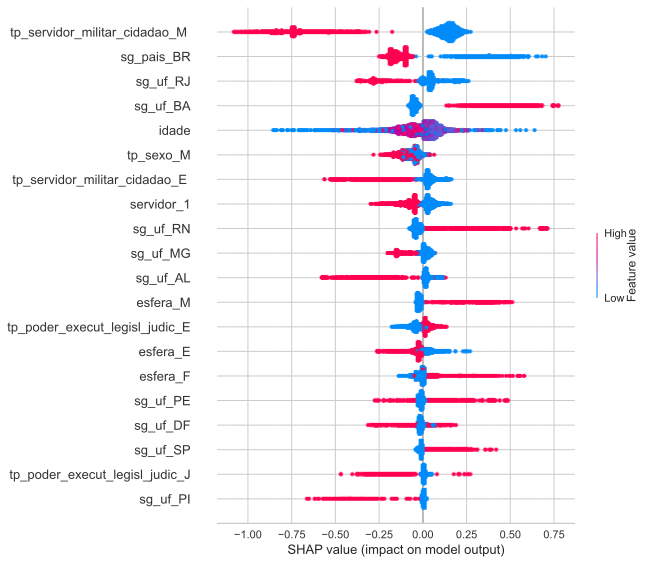

In [26]:
interpret_model(dt_1)

In [19]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79614 entries, 0 to 79613
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ∩╗┐index                      79614 non-null  int64         
 1   id_inscricao                  79614 non-null  int64         
 2   dt_inscricao                  79614 non-null  datetime64[ns]
 3   dt_fim_inscricao              79614 non-null  datetime64[ns]
 4   tx_nome_aluno                 79614 non-null  object        
 5   sg_uf                         79107 non-null  object        
 6   tp_sexo                       79614 non-null  object        
 7   dt_nascimento                 79614 non-null  datetime64[ns]
 8   sg_pais                       67871 non-null  object        
 9   id_oferta_x                   79614 non-null  int64         
 10  id_curso                      79614 non-null  int64         
 11  qt_carga_horaria_oferta     

In [20]:
#Calculo do número do dia em que as atividades foram feitas em relação a data de inscrição
alunos['dia_atividade_1'] = alunos['data_entrega_atividade_1'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_2'] = alunos['data_entrega_atividade_2'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_3'] = alunos['data_entrega_atividade_3'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_4'] = alunos['data_entrega_atividade_4'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_5'] = alunos['data_entrega_atividade_5'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_6'] = alunos['data_entrega_atividade_6'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_7'] = alunos['data_entrega_atividade_7'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_8'] = alunos['data_entrega_atividade_8'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_9'] = alunos['data_entrega_atividade_9'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_10'] = alunos['data_entrega_atividade_10'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_11'] = alunos['data_entrega_atividade_11'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_12'] = alunos['data_entrega_atividade_12'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_13'] = alunos['data_entrega_atividade_13'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_14'] = alunos['data_entrega_atividade_14'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_15'] = alunos['data_entrega_atividade_15'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_16'] = alunos['data_entrega_atividade_16'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_17'] = alunos['data_entrega_atividade_17'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['dia_atividade_18'] = alunos['data_entrega_atividade_18'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')
alunos['prazo'] = alunos['dt_fim_inscricao'].sub(alunos['dt_inscricao'], axis=0).astype('timedelta64[D]')


alunos.head(50)

,∩╗┐index,id_inscricao,dt_inscricao,dt_fim_inscricao,tx_nome_aluno,sg_uf,tp_sexo,dt_nascimento,sg_pais,id_oferta_x,id_curso,qt_carga_horaria_oferta,qt_duracao_dias,tx_nome_orgao,sit_matricula,tp_servidor_militar_cidadao,tp_poder_execut_legisl_judic,esfera,idade,churn,id_oferta_y,id_pessoa,nota_maxima_curso,nota_final_aluno_curso,data_termino_curso_aluno,nota_maxima_atividade_1,nota_aluno_atividade_1,data_entrega_atividade_1,nota_maxima_atividade_2,nota_aluno_atividade_2,data_entrega_atividade_2,nota_maxima_atividade_3,nota_aluno_atividade_3,data_entrega_atividade_3,nota_maxima_atividade_4,nota_aluno_atividade_4,data_entrega_atividade_4,nota_maxima_atividade_5,nota_aluno_atividade_5,data_entrega_atividade_5,nota_maxima_atividade_6,nota_aluno_atividade_6,data_entrega_atividade_6,nota_maxima_atividade_7,nota_aluno_atividade_7,data_entrega_atividade_7,nota_maxima_atividade_8,nota_aluno_atividade_8,data_entrega_atividade_8,nota_maxima_atividade_9,nota_aluno_atividade_9,data_entrega_atividade_9,nota_maxima_atividade_10,nota_aluno_atividade_10,data_entrega_atividade_10,nota_maxima_atividade_11,nota_aluno_atividade_11,data_entrega_atividade_11,nota_maxima_atividade_12,nota_aluno_atividade_12,data_entrega_atividade_12,nota_maxima_atividade_13,nota_aluno_atividade_13,data_entrega_atividade_13,nota_maxima_atividade_14,nota_aluno_atividade_14,data_entrega_atividade_14,nota_maxima_atividade_15,nota_aluno_atividade_15,data_entrega_atividade_15,nota_maxima_atividade_16,nota_aluno_atividade_16,data_entrega_atividade_16,nota_maxima_atividade_17,nota_aluno_atividade_17,data_entrega_atividade_17,nota_maxima_atividade_18,nota_aluno_atividade_18,data_entrega_atividade_18,servidor,dia_atividade_1,dia_atividade_2,dia_atividade_3,dia_atividade_4,dia_atividade_5,dia_atividade_6,dia_atividade_7,dia_atividade_8,dia_atividade_9,dia_atividade_10,dia_atividade_11,dia_atividade_12,dia_atividade_13,dia_atividade_14,dia_atividade_15,dia_atividade_16,dia_atividade_17,dia_atividade_18,prazo
0,0,92,2018-02-19,2018-03-12 07:42:00,Raylle Hostalacio de Pinho Tavares,MG,F,1958-07-28,NaN,26,74,20,30,NaN,APROVADO,S,E,E,59,False,26,448556,100.0,95.24050,2018-03-07 08:05:50,100.0,100.0,2018-02-20 08:58:57,100.0,100.0,2018-02-20 09:07:44,100.0,100.0,2018-03-07 07:29:17,100.0,100.0,2018-02-21 08:05:49,100.0,100.00,2018-02-22 07:56:43,100.0,100.00,2018-02-22 08:08:30,100.0,100.0,2018-02-23 07:24:35,100.0,100.0,2018-02-23 07:55:10,100.0,100.00,2018-02-23 08:30:46,100.0,83.33,2018-03-07 07:46:43,100.0,77.78,2018-03-07 08:05:50,100.0,83.33,2018-02-28 08:22:58,100.0,100.0,2018-03-01 07:59:11,100.0,90.0,2018-03-02 08:03:11,100.0,100.00,2018-03-02 08:30:38,100.0,88.89,2018-03-05 07:40:28,100.0,100.00,2018-03-06 07:42:09,100.0,100.00,2018-07-03 07:18:59,0,1.0,1.0,16.0,2.0,3.0,3.0,4.0,4.0,4.0,16.0,16.0,9.0,10.0,11.0,11.0,14.0,15.0,134.0,21.0
1,1,94,2018-02-19,2018-03-12 07:59:00,HENRICLAY CERNADAS PEREIRA,RJ,M,1973-06-15,NaN,26,74,20,30,Universidade Federal Fluminense,ABANDONO,S,E,F,44,True,26,180937,100.0,NaN,NaN,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,100.0,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
2,2,97,2018-02-19,2018-03-12 08:44:00,THAIS AMARAL COUTINHO,MG,F,1949-06-19,NaN,26,74,20,30,NaN,APROVADO,S,E,E,68,False,26,448559,100.0,100.00000,2018-03-04 09:10:30,100.0,100.0,2018-03-03 07:16:18,100.0,100.0,2018-02-19 19:30:28,100.0,100.0,2018-03-03 07:52:42,100.0,100.0,2018-03-03 08:05:55,100.0,100.00,2018-03-03 08:25:40,100.0,100.00,2018-03-03 08:38:47,100.0,100.0,2018-03-03 09:12:31,100.0,100.0,2018-03-03 09:34:45,100.0,100.00,2018-03-03 10:22:06,100.0,100.00,2018-03-03 13:34:16,100.0,100.00,2018-03-03 14:12:16,100.0,100.00,2018-03-03 14:42:09,100.0,100.0,2018-03-03 15:04:13,100.0,100.0,2018-03-03 19:23:30,100.0,100.00,2018-03-03 19:35:08,1

In [21]:
alunos['prazo'].unique()

array([21., 30.])

In [22]:
for i in range(1,19):
    string_i = str(i)
    alunos['tupla_nota_'+string_i] = alunos[['dia_atividade_'+string_i,
                                                       'nota_aluno_atividade_'+string_i]].apply(tuple, axis=1)

In [23]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79614 entries, 0 to 79613
Columns: 117 entries, ∩╗┐index to tupla_nota_18
dtypes: bool(1), datetime64[ns](21), float64(57), int64(10), object(28)
memory usage: 73.2+ MB


In [114]:
tupla = [col for col in alunos.columns if 'tupla_nota' in col]

periodo_1 = pd.DataFrame(columns=[
'sg_uf',
'tp_sexo',
'sg_pais',
'tx_nome_orgao',
'tp_servidor_militar_cidadao',
'tp_poder_execut_legisl_judic',
'esfera',
'churn',
#'prazo',
'media_notas',
'coef_notas'])

dic_list = []
for index, row in alunos.iterrows():
    notas = []
    dias = []
    for col in tupla:
        if (row[col][0] <= 3 and not pd.isna(row[col][1])):
            #print(row[col][1])
            notas.append(row[col][1])
            dias.append(row[col][0])
            
    
        
    if len(notas)>1:
        #print(notas)
        media_notas = statistics.mean(notas)

        slope, intercept, r_value, p_value, std_err = stats.linregress(range(1,len(dias)+1),notas)
        coef_notas = slope
    elif len(notas) == 1:
        #print(notas)
        media_notas = statistics.mean(notas)
        coef_notas = 0
    else:
        media_notas = 0
        coef_notas = 0
    
    # Empty dict
    d = {}

    d["id_inscricao"] = row['id_inscricao']
    d["sg_uf"] = row['sg_uf']
    d["tp_sexo"] = row['tp_sexo']
    d["sg_pais"] = row['sg_pais']
    d["tx_nome_orgao"] = row['tx_nome_orgao']
    d["tp_servidor_militar_cidadao"] = row['tp_servidor_militar_cidadao']
    d["tp_poder_execut_legisl_judic"] = row['tp_poder_execut_legisl_judic']
    d["esfera"] = row['esfera']
    d["churn"] = row['churn']
    d["prazo"] = row['prazo']
    d["media_notas"] = media_notas
    d["coef_notas"] = coef_notas
    d["qtd_atv"] = len(notas)
    
    
    
    
    dic_list.append(d)
    #print(index)

In [115]:
periodo_1 = pd.DataFrame(dic_list) 

In [116]:

periodo_1.isna().any()

id_inscricao                    False
sg_uf                            True
tp_sexo                         False
sg_pais                          True
tx_nome_orgao                    True
tp_servidor_militar_cidadao     False
tp_poder_execut_legisl_judic     True
esfera                           True
churn                           False
prazo                           False
media_notas                     False
coef_notas                      False
qtd_atv                         False
dtype: bool

In [117]:

periodo_1.reset_index()

periodo_1 = periodo_1.fillna('')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(periodo_1, periodo_1['churn'], test_size=0.3, random_state=1)

In [51]:
#X_train['outlier'] = yhat
X_train['churn'] = y_train
df_train =X_train

X_test['churn'] = y_test

In [52]:
periodo_1['qtd_atv'].unique()

array([10,  0,  1, 18,  6,  9, 12,  8,  7, 11, 13, 17,  3, 14,  4, 15,  2,
       16,  5], dtype=int64)

In [53]:
from pycaret.classification import *
s = setup(data = df_train,
          test_data = X_test,
          target = 'churn', 
          fix_imbalance=True,
          feature_selection = True,
         numeric_features = ['qtd_atv'])

,Description,Value
0,session_id,320
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(55729, 12)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,0
9,High Cardinality Features,0


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8917,0.9495,0.9710,0.7751,0.8621,0.7747,0.7880,24.6930
rf,Random Forest Classifier,0.8876,0.9436,0.9498,0.7773,0.8549,0.7647,0.7749,28.1060
lr,Logistic Regression,0.8872,0.9442,0.9796,0.7637,0.8583,0.7669,0.7834,41.2610
ada,Ada Boost Classifier,0.8871,0.9427,0.9782,0.7641,0.8580,0.7666,0.7827,25.5980
gbc,Gradient Boosting Classifier,0.8870,0.9467,0.9796,0.7635,0.8581,0.7667,0.7831,28.8160
et,Extra Trees Classifier,0.8841,0.9372,0.9383,0.7761,0.8495,0.7566,0.7656,29.7610
knn,K Neighbors Classifier,0.8837,0.9311,0.9014,0.7934,0.8438,0.7517,0.7558,46.1070
ridge,Ridge Classifier,0.8837,0.0000,0.9806,0.7573,0.8546,0.7603,0.7779,24.7700
lda,Linear Discriminant Analysis,0.8836,0.9421,0.9805,0.7572,0.8545,0.7601,0.7778,26.3040
svm,SVM - Linear Kernel,0.8832,0.0000,0.9805,0.7566,0.8541,0.7594,0.7771,25.9260


In [54]:
dt = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9379,0.9743,0.9743,0.8648,0.9163,0.8672,0.8711
1,0.9401,0.9757,0.9820,0.8645,0.9195,0.8721,0.8766
2,0.9426,0.9762,0.9774,0.8731,0.9223,0.8770,0.8805
3,0.9361,0.9743,0.9789,0.8579,0.9144,0.8638,0.8686
4,0.9343,0.9728,0.9784,0.8544,0.9122,0.8601,0.8652
5,0.9379,0.9747,0.9768,0.8631,0.9165,0.8674,0.8716
6,0.9370,0.9752,0.9789,0.8599,0.9155,0.8657,0.8703
7,0.9395,0.9754,0.9779,0.8660,0.9185,0.8707,0.8748
8,0.9383,0.9755,0.9815,0.8609,0.9173,0.8684,0.8731
9,0.9352,0.9720,0.9799,0.8553,0.9134,0.8620,0.8671


In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

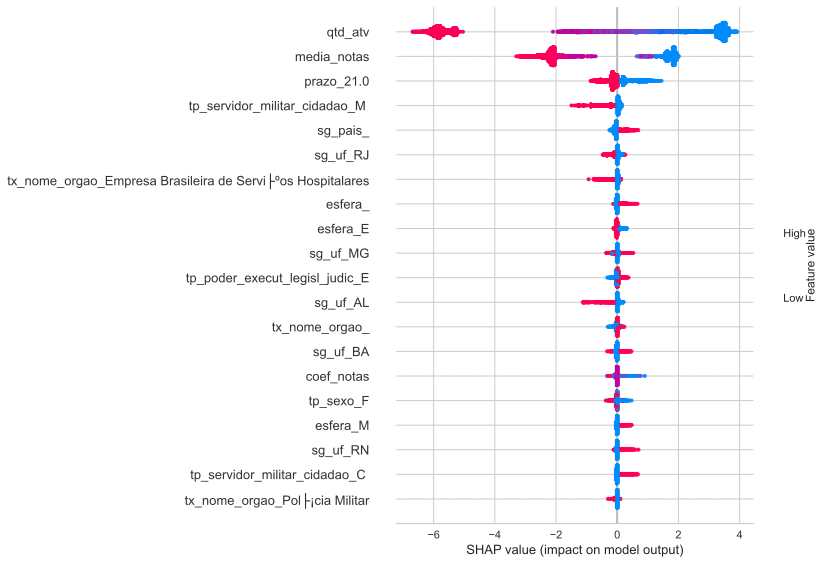

In [56]:
interpret_model(dt)

In [135]:
log_26 = pd.read_csv("dados\Logs-SEI\Logs_alunos_curso_SEI_oferta_26.csv",sep = ';',encoding ='cp860',parse_dates=
                     ['data_log'])

log_411 = pd.read_csv("dados\Logs-SEI\Logs_alunos_curso_SEI_oferta_411.csv",sep = ';',encoding ='cp860',parse_dates=
                     ['data_log'])


In [136]:
log = pd.concat([log_26,log_411])

In [137]:
log_aluno = log.merge(alunos[['id_inscricao','dt_inscricao']], on='id_inscricao', how='inner')
log_aluno['dia']= log_aluno['data_log'].sub(log_aluno['dt_inscricao'], axis=0).astype('timedelta64[D]')

In [138]:
log_aluno['acao'] = log_aluno['component'] + '/' + log_aluno['action'] + '/' +log_aluno['target']
log_aluno = log_aluno.drop(['component','action','target','id_log','dt_inscricao','data_log'], axis=1) 
log_aluno

,id_inscricao,id_oferta,dia,acao
0,94,26,0.0,core/viewed/course
1,115,26,3.0,core/viewed/course
2,115,26,3.0,core/viewed/user_list
3,115,26,3.0,core/viewed/user_list
4,115,26,3.0,core/viewed/user_list
...,...,...,...,...
4300548,315391,411,14.0,mod_scorm/viewed/course_module
4300549,315391,411,14.0,mod_scorm/launched/sco
4300550,315391,411,14.0,mod_scorm/submitted/scoreraw
4300551,315391,411,14.0,core/updated/course_module_completion


In [143]:
def encode_and_bind(original, feature_to_encode):
    dummies = pd.get_dummies(original[[feature_to_encode]])
    res = pd.concat([original, dummies], axis=1)
    return(res)

log_pivot = encode_and_bind( log_aluno, 'acao')

In [154]:
log_ok = log_pivot[log_pivot['dia']<=3].drop(['id_oferta','dia','acao'], axis=1).groupby('id_inscricao').sum().reset_index()
log_ok

,id_inscricao,acao_booktool_print/printed/book,acao_booktool_print/printed/chapter,acao_core/assigned/role,acao_core/created/user_enrolment,acao_core/deleted/course_section,acao_core/graded/user,acao_core/updated/course,acao_core/updated/course_module,acao_core/updated/course_module_completion,...,acao_mod_questionnaire/saved/attempt,acao_mod_questionnaire/submitted/attempt,acao_mod_questionnaire/viewed/all_responses,acao_mod_questionnaire/viewed/course_module,acao_mod_resource/viewed/course_module,acao_mod_scorm/launched/sco,acao_mod_scorm/submitted/scoreraw,acao_mod_scorm/submitted/status,acao_mod_scorm/viewed/course_module,acao_mod_url/viewed/course_module
0,92,0,0,0,0,0,7,0,0,60,...,0,0,0,0,4,7,7,6,9,29
1,94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,97,0,0,0,0,0,3,0,0,31,...,0,0,0,0,2,5,5,3,9,22
3,106,0,0,0,0,0,24,0,0,173,...,1,1,2,2,1,25,25,24,26,76
4,109,0,0,0,0,0,22,0,0,90,...,0,0,0,0,8,37,34,27,53,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,334435,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
13820,334453,0,0,0,0,0,2,0,0,20,...,0,0,0,0,3,2,2,2,3,8
13821,334458,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
13822,334463,0,0,0,0,0,7,0,0,65,...,0,0,0,0,0,7,7,7,7,28


In [155]:
periodo_act = periodo_1.merge(log_ok, on = 'id_inscricao',how = 'inner')
periodo_act

,id_inscricao,sg_uf,tp_sexo,sg_pais,tx_nome_orgao,tp_servidor_militar_cidadao,tp_poder_execut_legisl_judic,esfera,churn,prazo,...,acao_mod_questionnaire/saved/attempt,acao_mod_questionnaire/submitted/attempt,acao_mod_questionnaire/viewed/all_responses,acao_mod_questionnaire/viewed/course_module,acao_mod_resource/viewed/course_module,acao_mod_scorm/launched/sco,acao_mod_scorm/submitted/scoreraw,acao_mod_scorm/submitted/status,acao_mod_scorm/viewed/course_module,acao_mod_url/viewed/course_module
0,92,MG,F,,,S,E,E,False,21.0,...,0,0,0,0,4,7,7,6,9,29
1,94,RJ,M,,Universidade Federal Fluminense,S,E,F,True,21.0,...,0,0,0,0,0,0,0,0,0,0
2,97,MG,F,,,S,E,E,False,21.0,...,0,0,0,0,2,5,5,3,9,22
3,106,DF,M,,,C,,,False,21.0,...,1,1,2,2,1,25,25,24,26,76
4,109,TO,F,,,E,,F,False,21.0,...,0,0,0,0,8,37,34,27,53,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,334435,DF,M,,,S,E,E,True,21.0,...,0,0,0,0,2,0,0,0,0,0
13820,334453,MG,F,BR,,S,E,E,False,21.0,...,0,0,0,0,3,2,2,2,3,8
13821,334458,MG,F,BR,,E,,E,True,21.0,...,0,0,0,0,0,0,0,0,0,1
13822,334463,SP,M,BR,Pol├¡cia Militar,M,,E,False,21.0,...,0,0,0,0,0,7,7,7,7,28


In [168]:
periodo_1_redu = periodo_act[periodo_1.columns]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(periodo_1_redu, periodo_1_redu['churn'], test_size=0.3, random_state=1)

In [170]:
#X_train['outlier'] = yhat
X_train['churn'] = y_train
df_train =X_train

X_test['churn'] = y_test

In [171]:
from pycaret.classification import *
s = setup(data = df_train,
          test_data = X_test,
          target = 'churn', 
          fix_imbalance=True,
          feature_selection = True,
         numeric_features = ['qtd_atv'],
         ignore_features = ['id_inscricao'])

,Description,Value
0,session_id,7297
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(9676, 13)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,0
9,High Cardinality Features,0


In [175]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8911,0.9314,0.8118,0.7811,0.7959,0.7217,0.7221,0.4180
lightgbm,Light Gradient Boosting Machine,0.8690,0.9516,0.9601,0.6765,0.7935,0.7018,0.7251,0.2110
ada,Ada Boost Classifier,0.8685,0.9516,0.9676,0.6741,0.7944,0.7023,0.7274,0.3270
gbc,Gradient Boosting Classifier,0.8672,0.9532,0.9688,0.6715,0.7929,0.7000,0.7257,0.6590
lr,Logistic Regression,0.8667,0.9535,0.9712,0.6701,0.7927,0.6994,0.7258,1.2700
rf,Random Forest Classifier,0.8651,0.9464,0.9384,0.6750,0.7850,0.6906,0.7107,0.3450
svm,SVM - Linear Kernel,0.8642,0.0000,0.8360,0.7284,0.7350,0.6532,0.6806,0.3390
et,Extra Trees Classifier,0.8605,0.9385,0.9159,0.6719,0.7749,0.6773,0.6947,0.3950
dt,Decision Tree Classifier,0.8588,0.9341,0.9076,0.6709,0.7713,0.6725,0.6889,0.1990
ridge,Ridge Classifier,0.8466,0.0000,0.9949,0.6319,0.7728,0.6656,0.7048,0.2360


In [172]:
dt_act = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8616,0.9656,0.9843,0.6579,0.7886,0.6917,0.7227
1,0.8419,0.9455,0.9606,0.6305,0.7613,0.6506,0.6829
2,0.8667,0.9451,0.9724,0.6694,0.7929,0.6995,0.7261
3,0.8543,0.9550,0.9843,0.6460,0.7800,0.6780,0.7116
4,0.8926,0.9541,0.9605,0.7211,0.8237,0.7487,0.7646
5,0.8626,0.9541,0.9644,0.6630,0.7858,0.6897,0.7160
6,0.8769,0.9526,0.9763,0.6861,0.8059,0.7198,0.7438
7,0.8718,0.9583,0.9684,0.6787,0.7980,0.7083,0.7323
8,0.8780,0.9517,0.9565,0.6934,0.8040,0.7186,0.7382
9,0.8656,0.9496,0.9605,0.6694,0.7890,0.6949,0.7193


In [173]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
evaluate_model(dt_act)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [174]:
interpret_model(dt_act)

TypeError: This function only supports tree based models for binary classification: rf, dt, lightgbm, et.

In [176]:
alunos

,∩╗┐index,id_inscricao,dt_inscricao,dt_fim_inscricao,tx_nome_aluno,sg_uf,tp_sexo,dt_nascimento,sg_pais,id_oferta_x,...,tupla_nota_9,tupla_nota_10,tupla_nota_11,tupla_nota_12,tupla_nota_13,tupla_nota_14,tupla_nota_15,tupla_nota_16,tupla_nota_17,tupla_nota_18
0,0,92,2018-02-19 00:00:00,2018-03-12 07:42:00,Raylle Hostalacio de Pinho Tavares,MG,F,1958-07-28,NaN,26,...,"(4.0, 100.0)","(16.0, 83.33)","(16.0, 77.78)","(9.0, 83.33)","(10.0, 100.0)","(11.0, 90.0)","(11.0, 100.0)","(14.0, 88.89)","(15.0, 100.0)","(134.0, 100.0)"
1,1,94,2018-02-19 00:00:00,2018-03-12 07:59:00,HENRICLAY CERNADAS PEREIRA,RJ,M,1973-06-15,NaN,26,...,"(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)"
2,2,97,2018-02-19 00:00:00,2018-03-12 08:44:00,THAIS AMARAL COUTINHO,MG,F,1949-06-19,NaN,26,...,"(12.0, 100.0)","(12.0, 100.0)","(12.0, 100.0)","(12.0, 100.0)","(12.0, 100.0)","(12.0, 100.0)","(12.0, 100.0)","(13.0, 100.0)","(13.0, 100.0)","(43.0, 100.0)"
3,3,106,2018-02-19 00:00:00,2018-03-12 09:45:00,Thiago vieira Medeiros,DF,M,1984-10-07,NaN,26,...,"(1.0, 100.0)","(1.0, 75.0)","(1.0, 88.89)","(1.0, 83.33)","(2.0, 100.0)","(2.0, 100.0)","(2.0, 100.0)","(3.0, 77.78)","(3.0, 100.0)","(3.0, 100.0)"
4,4,109,2018-02-19 00:00:00,2018-03-12 10:08:00,Ana Maria Ribeiro Moraes,TO,F,1978-04-13,NaN,26,...,"(3.0, 94.74)","(4.0, 91.67)","(4.0, 88.89)","(4.0, 100.0)","(4.0, 100.0)","(4.0, 80.0)","(5.0, 83.33)","(5.0, 77.78)","(5.0, 85.71)","(5.0, 100.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79609,79609,553927,2019-02-27 22:39:00,2019-03-29 23:59:00,lidiane carvalho gontijo,MG,F,1978-12-22,BR,852,...,"(0.0, 94.74)","(0.0, 50.0)","(0.0, 22.22)","(0.0, 83.33)","(0.0, 80.0)","(0.0, 100.0)","(0.0, 83.33)","(0.0, 77.78)","(0.0, 100.0)","(0.0, 100.0)"
79610,79610,553937,2019-02-27 22:37:00,2019-03-29 23:59:00,anair soares da costa,RN,F,1967-05-20,BR,852,...,"(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)"
79611,79611,553995,2019-02-27 23:57:00,2019-03-29 23:59:00,ADEILTON AMADO SILVA DOS SANTOS,AL,M,1981-08-02,BR,852,...,"(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)"
79612,79612,554003,2019-02-27 23:57:00,2019-03-29 23:59:00,ROBSON PEREIRA DA SILVA,PE,M,1983-11-20,BR,852,...,"(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)"


In [188]:
alunos[alunos['servidor'] == 0]['churn'].value_counts(normalize=True) * 100

False    59.47252
True     40.52748
Name: churn, dtype: float64

In [189]:
alunos[alunos['servidor'] == 1]['churn'].value_counts(normalize=True) * 100

False    71.940104
True     28.059896
Name: churn, dtype: float64